In [39]:
import pandas as pd
import numpy as np

df=pd.read_csv("Hamburger.csv")

In [40]:
from sklearn.utils.discovery import all_estimators
# 다음 4개에 대해서 진행! 
estimators=all_estimators(type_filter='regressor')
for i in estimators:
    if "svm" in str(i[1]) :
        print(i)

('LinearSVR', <class 'sklearn.svm._classes.LinearSVR'>)
('NuSVR', <class 'sklearn.svm._classes.NuSVR'>)
('SVR', <class 'sklearn.svm._classes.SVR'>)


In [41]:
# 위의 SVR들을 모두 import
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR

from sklearn.model_selection import GridSearchCV # 최적의 파라미터를 찾기 위한 그리드서치 및 기타 기능 import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df.head(3)

,restaurant,item,calories,sodium,sugar,total_fat,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380.0,1110.0,11.0,7.0,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840.0,1580.0,18.0,45.0,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130.0,1920.0,18.0,67.0,70.0


In [43]:
feature=df[["sodium","sugar","total_fat","protein"]]
target=df["calories"]

In [44]:
# SVR : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR
test_max=0
train_max=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=i)
    model=SVR()
    model.fit(x_train,y_train)
    res1 = model.score(x_train,y_train)
    res2 = model.score(x_test,y_test)
    if np.abs(res1-res2) < 0.01 and res1 > train_max:
        train_max=res1
        test_max=res2
        print(train_max, test_max)

0.23817600277800766 0.23948374960416563
0.24208542972914093 0.24992200971796275
0.24710666141232396 0.24703357564938555
0.24758532626539698 0.24397348435823774
0.24854053807577425 0.24389981276581296
0.2511405187210316 0.2474282582821774


In [45]:
# LinearSVR : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR
test_max=0
train_max=0
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=i)
    model=LinearSVR(max_iter=1000000, dual="auto")
    model.fit(x_train,y_train)
    res1 = model.score(x_train,y_train)
    res2 = model.score(x_test,y_test)
    if np.abs(res1-res2) < 0.01 and res1 > train_max:
        train_max=res1
        test_max=res2
        print(train_max, test_max)

0.8450569000810888 0.848045618836223


In [46]:
#  NuSVR : https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR
test_max=0
train_max=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=i)
    model=NuSVR()
    model.fit(x_train,y_train)
    res1 = model.score(x_train,y_train)
    res2 = model.score(x_test,y_test)
    if np.abs(res1-res2) < 0.01 and res1 > train_max:
        train_max=res1
        test_max=res2
        print(train_max, test_max)

0.21974758962746455 0.22218119319697893
0.226100754946293 0.22491011485387113
0.22663428448611822 0.2182711130231545
0.2288196081496613 0.22073277809941405
0.23018253795704358 0.22971182611937624


In [47]:
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
print(df)
target=df['cal_level']
target.value_counts()

        restaurant                                       item  calories  \
0        Mcdonalds           Artisan Grilled Chicken Sandwich    380.00   
1        Mcdonalds             Single Bacon Smokehouse Burger    840.00   
2        Mcdonalds             Double Bacon Smokehouse Burger   1130.00   
3        Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich    750.00   
4        Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich    920.00   
...            ...                                        ...       ...   
1063  prank_burger                                  더블치즈버거(L)    687.04   
1064  prank_burger                                   머쉬룸버거(L)    665.30   
1065  prank_burger                                    JG버거(L)    828.28   
1066  prank_burger                                 SG불고기버거(L)    491.06   
1067  prank_burger                                SG크림치즈버거(L)    613.32   

       sodium  sugar  total_fat  protein cal_level  
0     1110.00  11.00       7.00    37.00    me

cal_level
low       362
medium    361
high      345
Name: count, dtype: int64

In [48]:
from sklearn.svm import SVC
#  SVC : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
test_max=0
train_max=0
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=i)
    model=SVC()
    model.fit(x_train,y_train)
    res1 = model.score(x_train,y_train)
    res2 = model.score(x_test,y_test)
    if np.abs(res1-res2) < 0.01 and res1 > train_max:
        train_max=res1
        test_max=res2
        print(train_max, test_max)

0.7242302543507363 0.7258566978193146


In [49]:
df[["calories","sugar","sodium","total_fat","protein"]].corr() # 설탕과 지방이 칼로리와 상관관계가 높음

,calories,sugar,sodium,total_fat,protein
calories,1.000000,0.305116,0.811985,0.723007,0.172215
sugar,0.305116,1.000000,-0.096722,-0.055567,0.065918
sodium,0.811985,-0.096722,1.000000,0.706815,0.005060
total_fat,0.723007,-0.055567,0.706815,1.000000,0.093055
protein,0.172215,0.065918,0.005060,0.093055,1.000000


In [59]:

import matplotlib.pyplot as plt

df=pd.read_csv("Hamburger.csv")
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
feature=df[["sodium","total_fat"]]
target=df["cal_level"]
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
clf =   SVC()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

def plot_decision_boundary(model, X, y):
    
    h = 1  # 메쉬 그리드 단위

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(pd.DataFrame(Z).value_counts())

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # 데이터 포인트 플로팅
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('sodium')
    plt.ylabel('total_fat')
    
feature=np.array(feature)
target=np.array(target)
plot_decision_boundary(clf, feature, target)
plt.show()
# model.named_steps["svc"]

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7725856697819314


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("Hamburger.csv")
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
feature=df[["sodium","total_fat"]]
target=df["cal_level"]
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3)
scaler=StandardScaler()

C:\Users\mathn\AppData\Local\Temp\ipykernel_14656\3177515741.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\mathn\AppData\Local\Temp\ipykernel_14656\3177515741.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


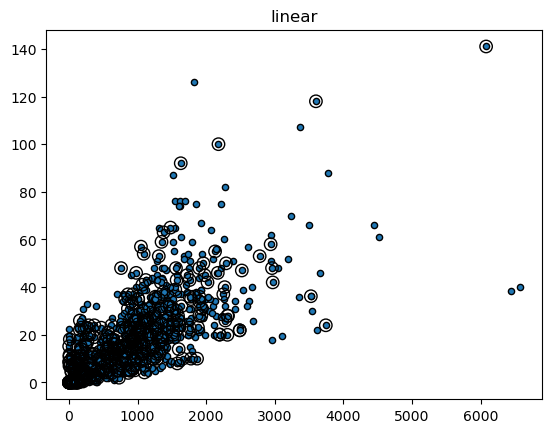

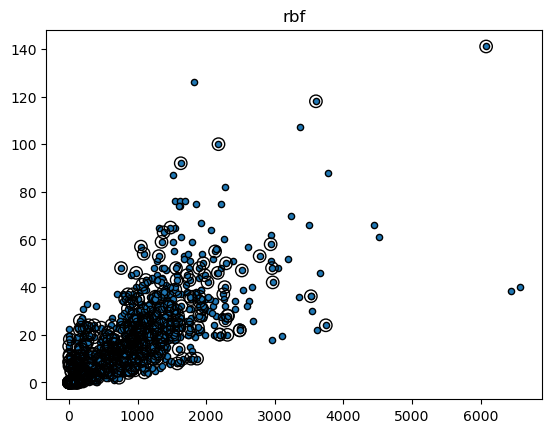

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = np.array(feature)
y = np.array(target)
n_sample = len(X)

np.random.seed(0)

X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

# fit the model
for kernel in ("linear", "rbf"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )
    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    plt.title(kernel)
plt.show()

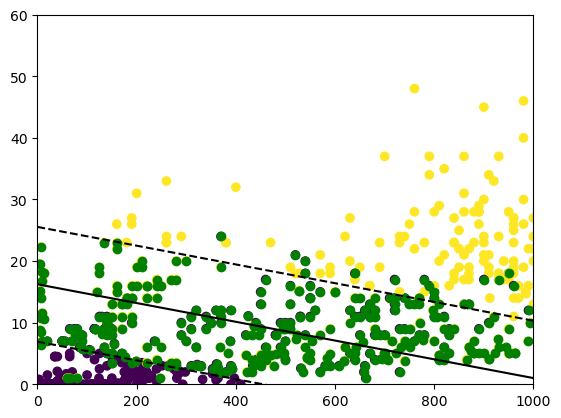

In [6]:
from sklearn.svm import SVC

df=pd.read_csv("Hamburger.csv")
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
feature=df[["sodium","total_fat"]]
target=df["cal_level"]
target.replace({"low":0, "medium":1, "high":1}, inplace=True) 

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(0, 1000) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sodium"].values,feature["total_fat"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.xlim(0, 1000)
plt.ylim(0, 60)
plt.show()

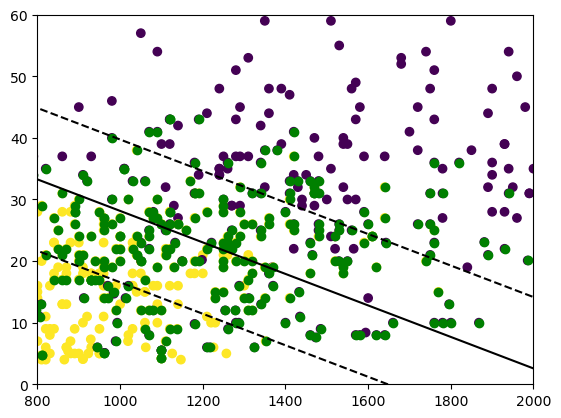

In [9]:
from sklearn.svm import SVC

df=pd.read_csv("Hamburger.csv")
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
feature=df[["sodium","total_fat"]]
target=df["cal_level"]
target.replace({"low":1, "medium":1, "high":0}, inplace=True) 

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(0, 2000) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sodium"].values,feature["total_fat"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.xlim(800, 2000)
plt.ylim(0, 60)
plt.show()